In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist

In [45]:
nb = 16000
nhid = 256
draw = 10

In [46]:
def num_linkage_below_threshold(Z, distance, num_elem):
    elem_in_linkage = len(Z)
    count_clusters = 0
    elems_seen = {}

    for i in Z:
        # Check if this cluster is made with a good distance.
        if i[2] <= distance:
            count_clusters += 1
            if i[0] >= elem_in_linkage:
                count_clusters -= 1
            else:
                elems_seen[i[0]] = 1
            if i[1] >= elem_in_linkage:
                count_clusters -= 1 
            else:
                elems_seen[i[1]] = 1
    count_clusters += num_elem - len(elems_seen.keys())

    # print('Number of clusters :%d ' % (count_clusters))
    return count_clusters

def curve_clusters_count(Z, num_elem):
    X = np.arange(10, 201, 10)
    Y = []
    for i in X:
        Y += [num_linkage_below_threshold(Z, i, num_elem)]
    return Y
    plt.plot(X, Y)
    plt.xlim(10, 200)
    plt.show()


def print_metrics():
    Ys = []
    for i in range(draw):
        X = np.random.randint(2, size=(nb, nhid))
        Z = linkage(256 * pdist(X, metric='hamming'), 'complete', metric='precomputed')
        Ys += [curve_clusters_count(Z, nb)]
    Ys = np.array(Ys)
    
    Ys_min = Ys.min(0)
    Ys_max = Ys.max(0)
    Ys_avg = Ys.mean(0)
    X = np.arange(10, 201, 10)
    plt.plot(X, Ys_min, 'r--')
    plt.plot(X, Ys_max, 'r-+')
    plt.plot(X, Ys_avg, 'b')
    plt.show()

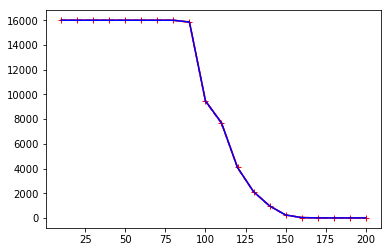

In [47]:
print_metrics()